In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from PySUSSIX.PySussix import Sussix
import PySUSSIX.ducksussix.ducksussix as ducksussix
import sys
import pandas as pd

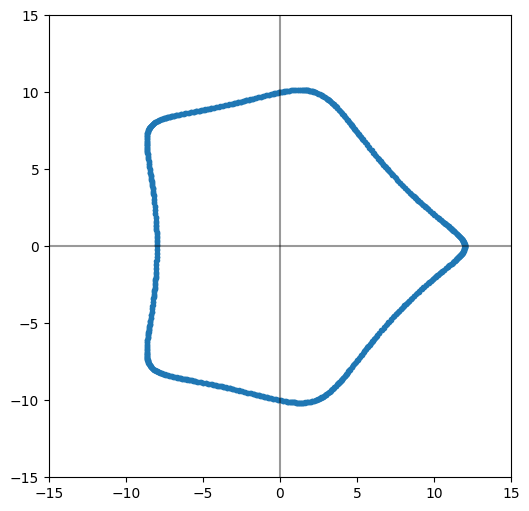

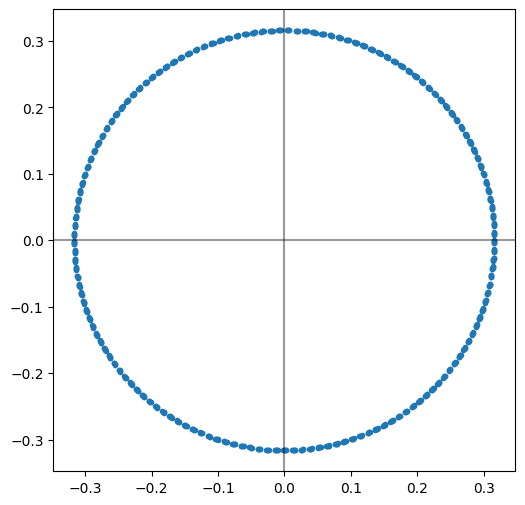

In [7]:

turns = int(1000)
N     = np.arange(0,turns)

Qx    = 0.31025793875089835
Qy    = 0.320264
Jx    = (0.5*(10**2))
Jy    = 1e-3*Jx
psi0  = 0#0.25

mn = [(2,0),(4,0)]
aj = [0.02*Jx,0.02*Jx,0.02*Jx]
phasors = sum([a*np.exp(1j*(2*np.pi*(m*Qx+n*Qy)*N + 0)) for (m,n),a in zip(mn,aj)])

hx = np.sqrt(2*Jx)*np.exp(-1j*(2*np.pi*Qx*N - psi0)) + phasors
x  = hx.real
px = hx.imag

hy = np.sqrt(2*Jy)*np.exp(-1j*(2*np.pi*Qy*N - psi0))
y  = hy.real
py = hy.imag

plt.figure(figsize=(6,6))
plt.plot(x,px,'.')
# plt.plot(hx.real,hx.imag,'.',ms=2)
plt.axhline(0,color='k',alpha=0.4)
plt.axvline(0,color='k',alpha=0.4)
plt.axis('square');
plt.xlim([-15,15])
plt.ylim([-15,15])


plt.figure(figsize=(6,6))
plt.plot(y,py,'.')
# plt.plot(hx.real,hx.imag,'.',ms=2)
plt.axhline(0,color='k',alpha=0.4)
plt.axvline(0,color='k',alpha=0.4)
plt.axis('square');
# plt.xlim([-15,15])
# plt.ylim([-15,15])
# 

/var/folders/yf/hpn77ycx7h50r6rt81q7lghr0000gn/T/ipykernel_63936/3565826482.py:33: RuntimeWarning: divide by zero encountered in divide
  plt.plot(np.abs((px-px_r)/px),'o',alpha=0.2)


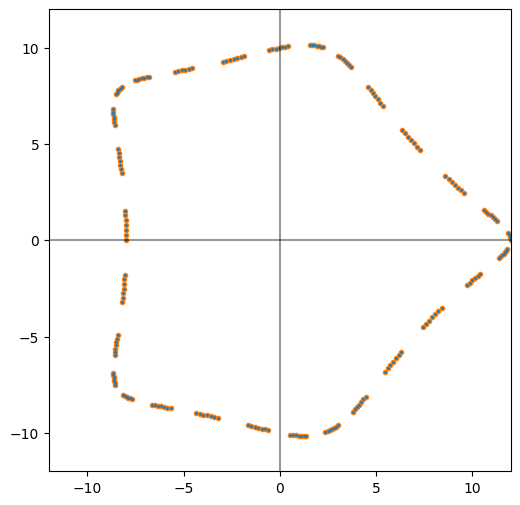

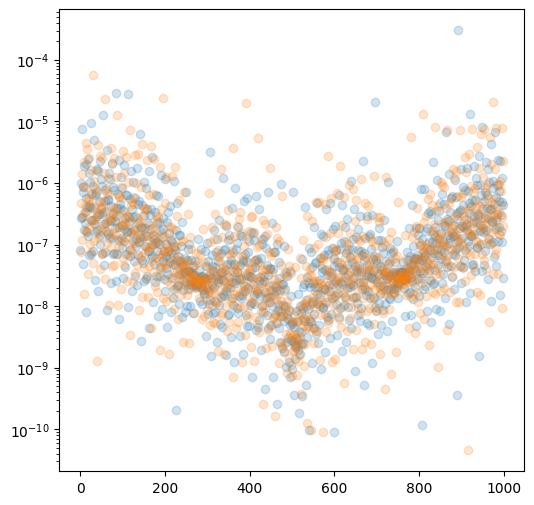

In [8]:



x  = hx.real
px = hx.imag
results = ducksussix.get_harmonics( x       = x, 
                                    px      = px,
                                    y       = None,
                                    py      = None,
                                    zeta    = None,
                                    pzeta   = None,
                                    number_of_harmonics = 5,Hann_order = 1)
A,Q = results['x'].amplitude,results['x'].frequency


reconstructed = sum([_a*np.exp(1j*(2*np.pi*(_q)*N  )) for _a,_q in zip(A,Q)])



x_r  =  reconstructed.real
px_r =  reconstructed.imag

show_turn = 200
plt.figure(figsize=(6,6))
plt.plot(x_r[:show_turn],px_r[:show_turn],'.',color='C1')
plt.plot(x[:show_turn],px[:show_turn],'.',color='C0',ms=2)
# plt.plot(hx.real,hx.imag,'.',ms=2)
plt.axhline(0,color='k',alpha=0.4)
plt.axvline(0,color='k',alpha=0.4)
plt.axis('square');
plt.xlim([-12,12])
plt.ylim([-12,12])

plt.figure(figsize=(6,6))
plt.plot(np.abs((x-x_r)/x),'o',alpha=0.2)
plt.plot(np.abs((px-px_r)/px),'o',alpha=0.2)
plt.yscale('log')

In [9]:
results['x']

,amplitude,frequency
0,9.999999+0.000005j,-0.310258
1,1.000000-0.000000j,-0.379484
2,1.000000+0.000000j,0.241032
3,-0.000001-0.000001j,-0.309456
4,0.000001-0.000000j,-0.311144


---
# Henon Map test
---

<lambdifygenerated-4>:2: RuntimeWarning: overflow encountered in scalar power
  return p_x**3 + 0.7*p_x**2 + 0.4*p_x - x
<lambdifygenerated-4>:2: RuntimeWarning: invalid value encountered in scalar subtract
  return p_x**3 + 0.7*p_x**2 + 0.4*p_x - x


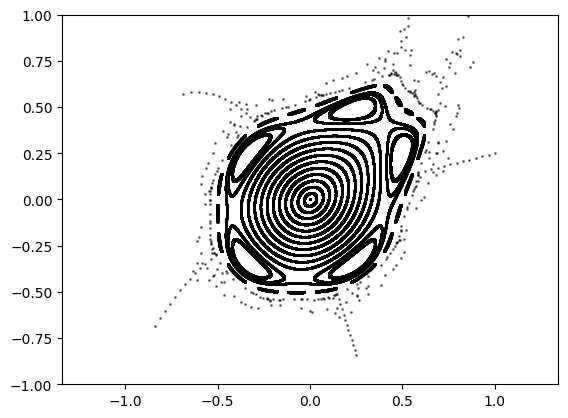

In [10]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing(use_unicode=True,fontsize=24)
import sys

sys.path.append('../McMillan/')
import McMillan.Maps.Maps as maps
import McMillan.Plotting.McMPlots as mcmplt




x,px,a,b,c,d = sp.symbols('x p_x a b c d',real=True,positive=True)

#=========================
# MAP
a = 0.4
b = 0.7
c = 1
xp  =  px
pxp =  -x +a*px + b*px**2 + c*px**3

henon = maps.Map1D(xp,pxp,x,px)
#==========================


turns = int(10000)
N     = np.arange(0,turns)

plt.figure()


x_points =np.linspace(0,1,30)
px_points = 0.25*x_points#0.25*np.linspace(0,1,30)



for part_x,part_px in zip(x_points,px_points):
    _x,_px =  henon.iterate(part_x,part_px,turns)
    plt.plot(_x,_px,'o',color='k',alpha=0.5,ms=1,label='space')

plt.axis('equal')
plt.xlim(-1,1)
plt.ylim(-1,1)

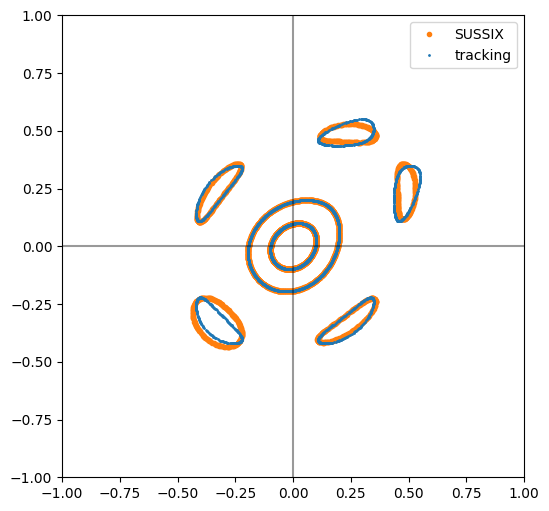

In [11]:
turns = int(1e5)
N     = np.arange(0,turns)
x_points = np.array([0.1,0.2,0.45])#np.linspace(0,1,30)
px_points = 0.25*x_points#0.25*np.linspace(0,1,30)

plt.figure(figsize=(6,6))
for part_x,part_px in zip(x_points,px_points):
    x,px =  henon.iterate(part_x,part_px,turns)
    results = ducksussix.get_harmonics( x       = x, 
                                        px      = px,
                                        y       = None,
                                        py      = None,
                                        zeta    = None,
                                        pzeta   = None,
                                        number_of_harmonics = 10,Hann_order = 1)
    A,Q = results['x'].amplitude,results['x'].frequency

    # if part_x == 0.45:
    #     A = A.loc[[0]]
    #     Q = Q.loc[[0]]

    reconstructed = sum([_a*np.exp(1j*(2*np.pi*(_q)*N  )) for _a,_q in zip(A,Q)])

    # display("part_x",part_x,results['x'])

    x_r  = reconstructed.real
    px_r = reconstructed.imag

    show_turn = 1000

    plt.plot(x_r[:show_turn],px_r[:show_turn],'.',color='C1')
    plt.plot(x[:show_turn],px[:show_turn],'.',color='C0',ms=2)


plt.plot(np.nan,np.nan,'.',color='C1',label='SUSSIX')
plt.plot(np.nan,np.nan,'.',color='C0',ms=2,label='tracking')

# plt.plot(hx.real,hx.imag,'.',ms=2)
plt.axhline(0,color='k',alpha=0.4)
plt.axvline(0,color='k',alpha=0.4)
plt.axis('square');
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.legend()

    # plt.figure(figsize=(6,6))
    # plt.plot(np.abs((x-x_r)/x),'o',alpha=0.2)
    # plt.plot(np.abs((px-px_r)/px),'o',alpha=0.2)
    # plt.yscale('log')

---
# 6D Tracking data
---

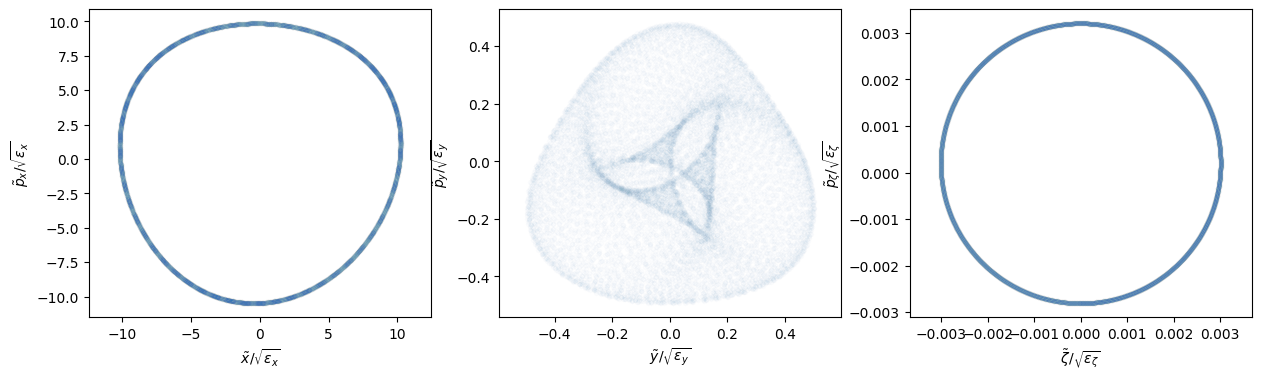

In [18]:

particle0 = pd.read_parquet('data/TEST_BUNCH_0000_XPLANE_ZETA_0.parquet')
particle1 = pd.read_parquet('data/TEST_BUNCH_0000_XPLANE_ZETA_1.parquet')

part = particle0
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for df in [part]:#,data_1.df_sig,data_2.df_sig]:

        
    # Plotting Here
    for plane,ax in zip(['x','y','zeta'],axes):
        plt.sca(ax)
        plt.plot(df[f'{plane}_sig'],df[f'p{plane}_sig'],'.',alpha=0.01)


# Adding labels
for plane,ax in zip(['x','y','zeta'],axes):
    plt.sca(ax)
    plt.axis('equal')
    if plane == 'zeta':
        plane = '\zeta'
    plt.xlabel(rf'$\tilde {plane}/\sqrt{{\varepsilon_{plane}}}$')
    plt.ylabel(rf'$\tilde p_{plane}/\sqrt{{\varepsilon_{plane}}}$')


# plt.figure(figsize=(15,4))
# plt.plot(particle.turn,0.5*(particle[f'x_sig']**2 + particle[f'px_sig']**2 ),'.',alpha=0.1)
# plt.xlabel('turn')
# plt.ylabel(r'$J_x$')


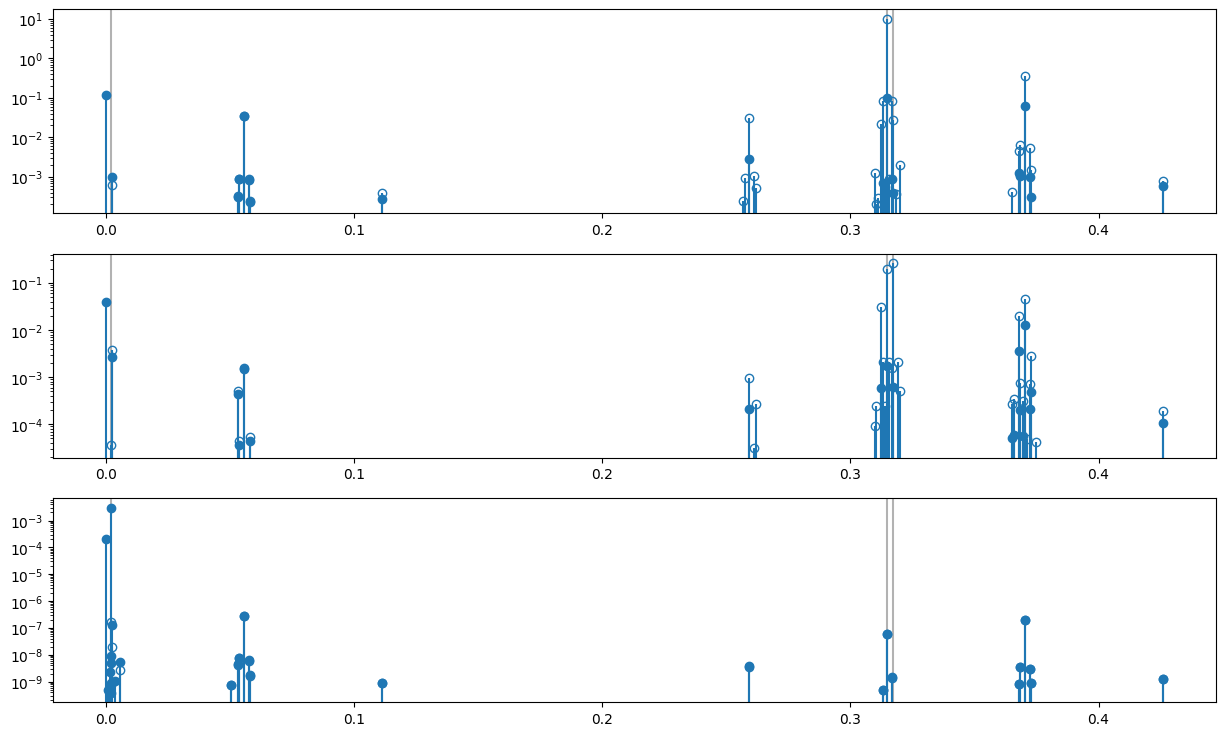

In [35]:
results = ducksussix.get_harmonics( x       = part.x_sig.values, 
                                    px      = part.px_sig.values,
                                    y       = part.y_sig.values,
                                    py      = part.py_sig.values,
                                    zeta    = part.zeta_sig.values,
                                    pzeta   = part.pzeta_sig.values,
                                    number_of_harmonics = 50,Hann_order = 1)

fig, axes = plt.subplots(3, 1, figsize=(15, 9))

        
# Plotting Here
for plane,ax in zip(['x','y','zeta'],axes):
    plt.sca(ax)
    df = results[plane]
    plt.stem(df[df.frequency>0].frequency,df[df.frequency>0].amplitude.abs(), linefmt=None, markerfmt=None, basefmt=None)
    markerline,_,_ = plt.stem(-df[df.frequency<0].frequency,df[df.frequency<0].amplitude.abs(), linefmt=None, markerfmt=None, basefmt=None)
    markerline.set_markerfacecolor('none')
    plt.yscale('log')

    for _plane in ['x','y','zeta']:
        plt.axvline(np.abs(results[_plane].frequency[0]),color='k',alpha=0.3,zorder=-10)
    # ax.set_yscale('symlog', linthresh=0.001)


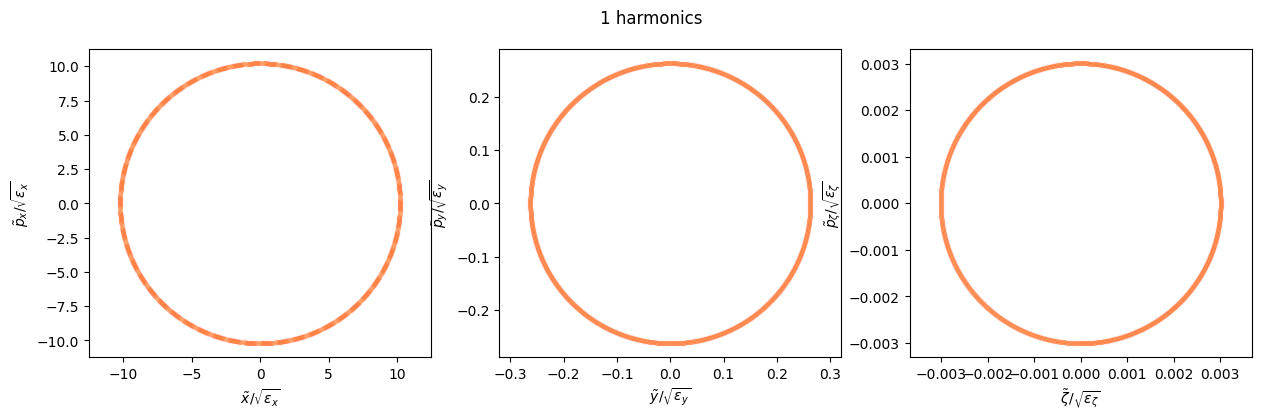

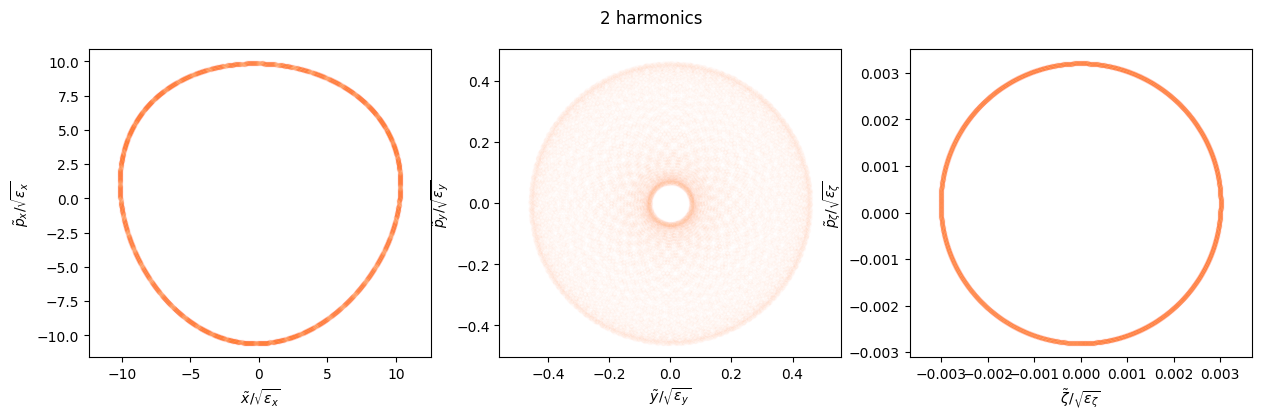

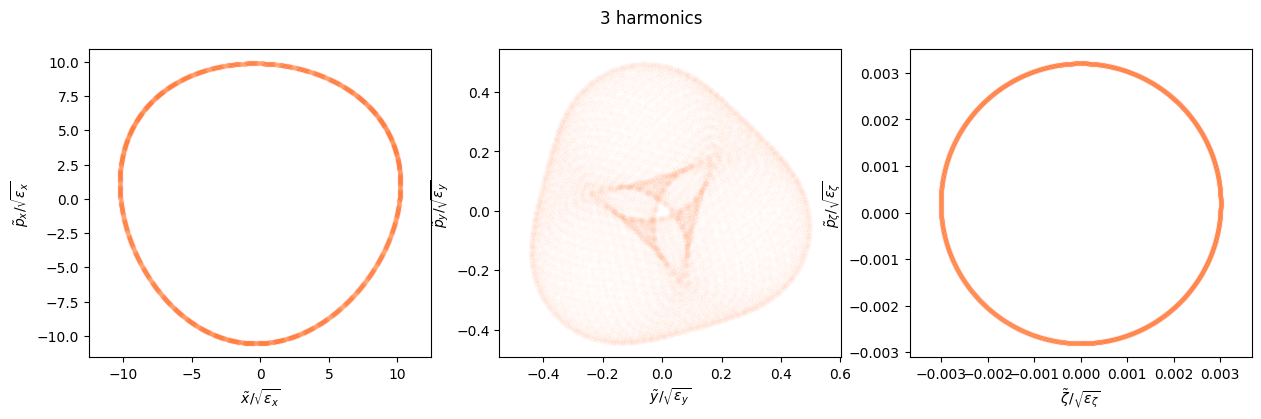

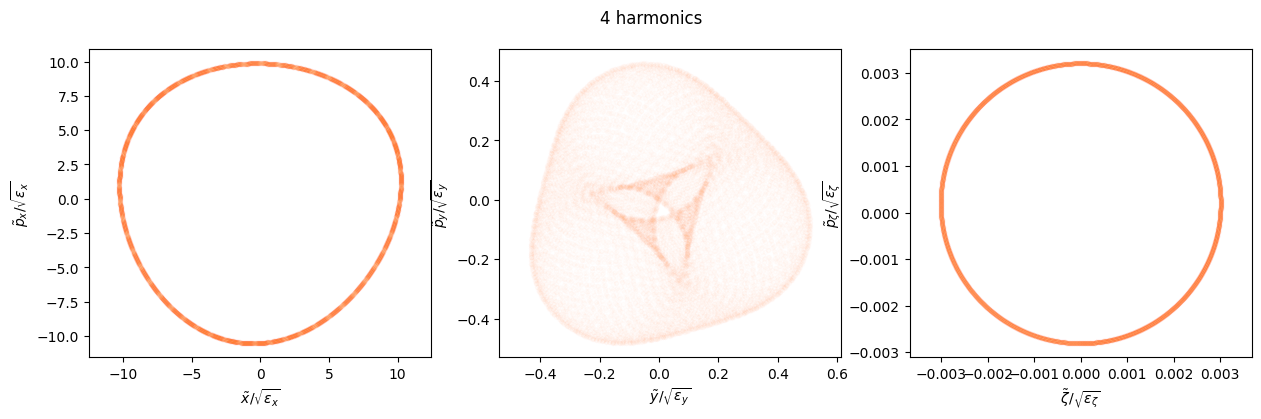

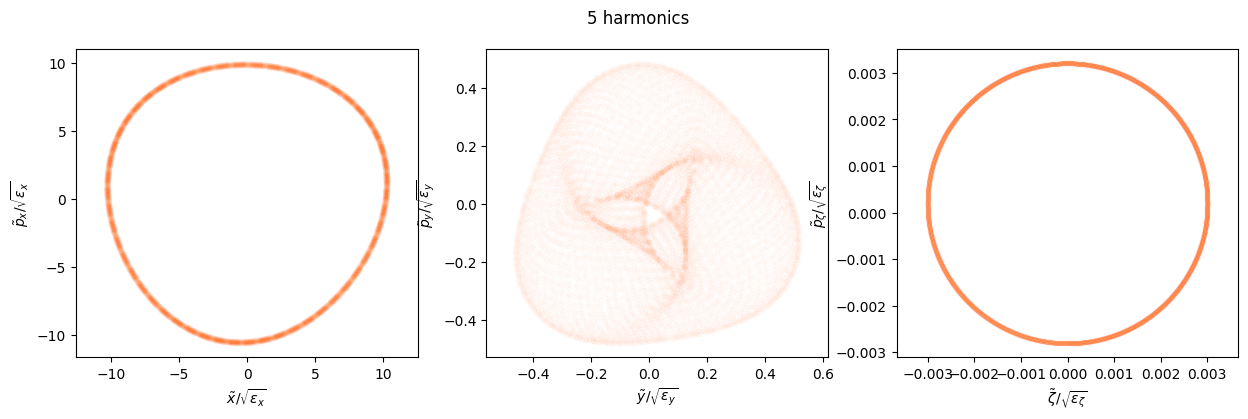

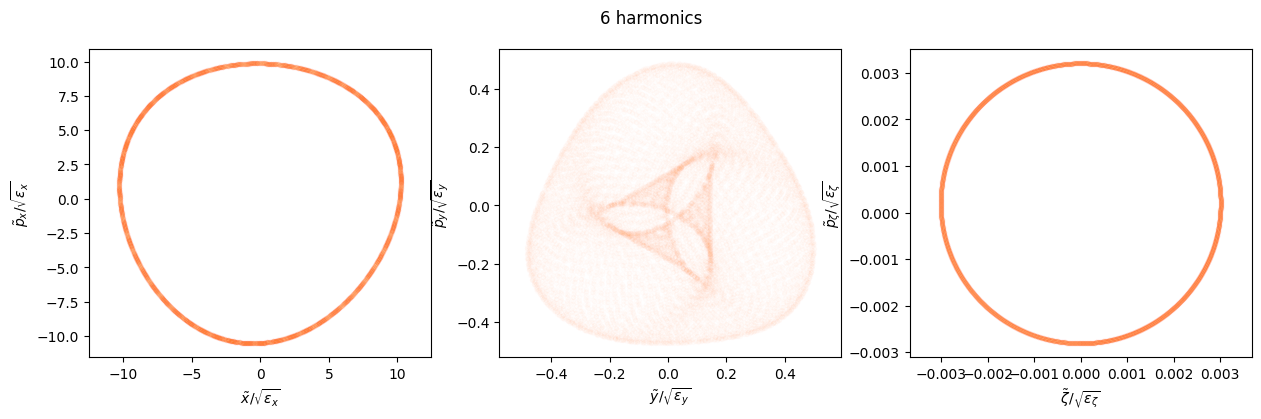

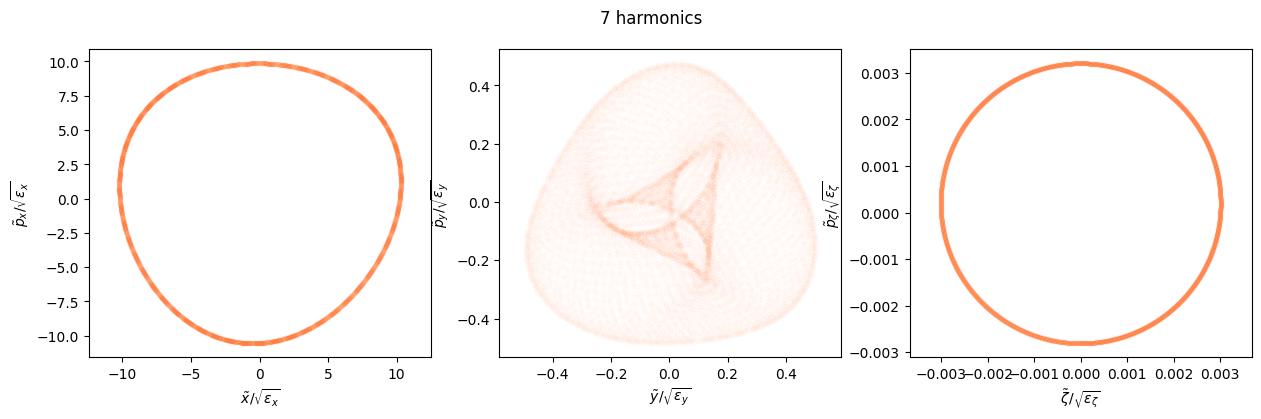

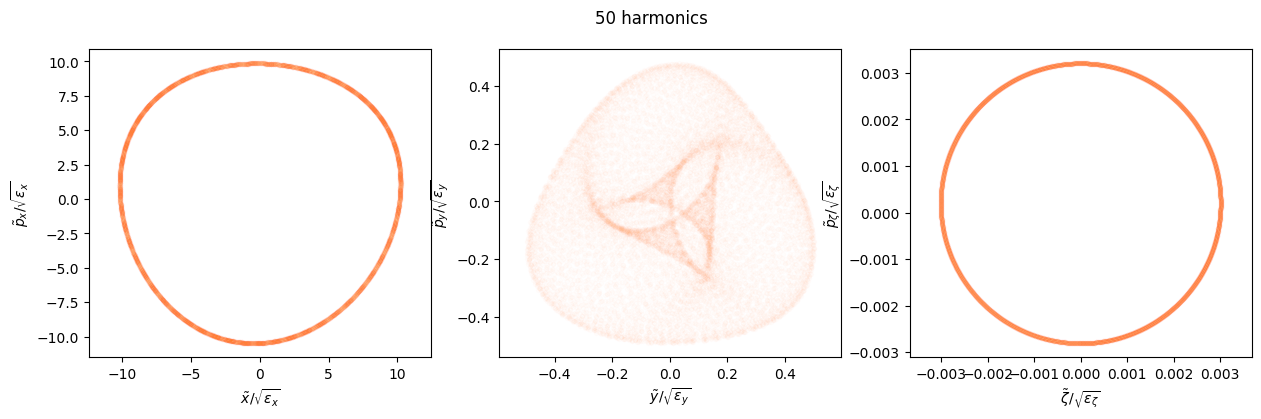

In [109]:

for n_harm in [1,2,3,4,5,6,7,50]:
    results = ducksussix.get_harmonics( x       = part.x_sig.values, 
                                    px      = part.px_sig.values,
                                    y       = part.y_sig.values,
                                    py      = part.py_sig.values,
                                    zeta    = part.zeta_sig.values,
                                    pzeta   = part.pzeta_sig.values,
                                    number_of_harmonics = n_harm,Hann_order = 1)
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    plt.suptitle(f'{n_harm} harmonics')
    # Plotting Here
    for plane,ax in zip(['x','y','zeta'],axes):
        plt.sca(ax)

        A,Q = results[plane].amplitude,results[plane].frequency
        N   = part.turn.values
        reconstructed = sum([_a*np.exp(1j*(2*np.pi*(_q)*N  )) for _a,_q in zip(A,Q)])

        z_r  = reconstructed.real
        pz_r = reconstructed.imag
        plt.plot(z_r,pz_r,'.',alpha=0.01,color='C1')


    # Adding labels
    for plane,ax in zip(['x','y','zeta'],axes):
        plt.sca(ax)
        plt.axis('equal')
        if plane == 'zeta':
            plane = '\zeta'
        plt.xlabel(rf'$\tilde {plane}/\sqrt{{\varepsilon_{plane}}}$')
        plt.ylabel(rf'$\tilde p_{plane}/\sqrt{{\varepsilon_{plane}}}$')




In [110]:
def find_linear_combinations(frequencies,fundamental_tunes = [],max_order = 10):

    assert len(fundamental_tunes) == 3, "Need 3 fundamental tunes"

    # Create a 3D array of all possible combinations of j, k, l
    j,k,l,m = np.mgrid[-max_order:max_order+1, -max_order:max_order+1,-max_order:max_order+1,-max_order:max_order+1]

    
    all_combinations = j * fundamental_tunes[0] + k * fundamental_tunes[1] + l * fundamental_tunes[2] + m
    
    # Base frequencies
    jklm = []
    err = []
    for freq in frequencies:

        # Find the index of the closest combination
        closest_idx = np.unravel_index(np.argmin(np.abs(freq - all_combinations)), all_combinations.shape)

        # Get the corresponding values for l, j, k
        closest_combination = (j[closest_idx], k[closest_idx], l[closest_idx],m[closest_idx])
        closest_value = all_combinations[closest_idx]

        jklm.append(closest_combination)
        err.append(np.abs(closest_value-freq))

    return pd.DataFrame({'jklm':jklm,'err':err,'freq':frequencies})

fundamental_tunes = [results[plane].loc[0,'frequency'] for plane in ['x','y','zeta']]
linear_jklm = find_linear_combinations(results['x'].frequency,fundamental_tunes = fundamental_tunes,max_order = 10)


In [111]:
linear_jklm

,jklm,err,freq
0,"(1, 0, 0, 0)",0.000000e+00,-3.148115e-01
1,"(-2, 0, 0, -1)",2.209138e-11,-3.703771e-01
2,"(0, 0, 0, 0)",3.365884e-12,3.365884e-12
3,"(-1, 0, 0, 0)",1.813683e-11,3.148115e-01
4,"(1, 0, -1, 0)",4.600834e-08,-3.166777e-01
5,"(1, 0, 1, 0)",3.748974e-08,-3.129452e-01
6,"(2, 0, 0, 1)",4.001405e-11,3.703771e-01
7,"(-3, 0, 0, -1)",7.804778e-12,-5.556560e-02
8,"(3, 0, 0, 1)",9.616981e-12,5.556560e-02
9,"(4, 0, 0, 1)",5.055467e-11,-2.592459e-01


In [114]:
import PySUSSIX.crosssussix.crossroutines as crossroutines
import PySUSSIX.crosssussix.crosssussix as crosssussix
import PySUSSIX.crosssussix.crossref as crossref
x = part.x_sig.values
datspe_x,datspe_y,datspe_s = crosssussix.datspe(part.x_sig.values, 
                                                part.px_sig.values,
                                                0*x,0*px,
                                                0*x,0*px,
                                                number_of_harmonics = 50,method = 'hanning',return_values = True)
ordres_x,ordres_y,ordres_s  = crosssussix.ordres(len(part.x_sig),tune_estimate = [0.31,0.32,0.0018],number_of_harmonics = 5,return_values = True)


NameError: name 'x' is not defined

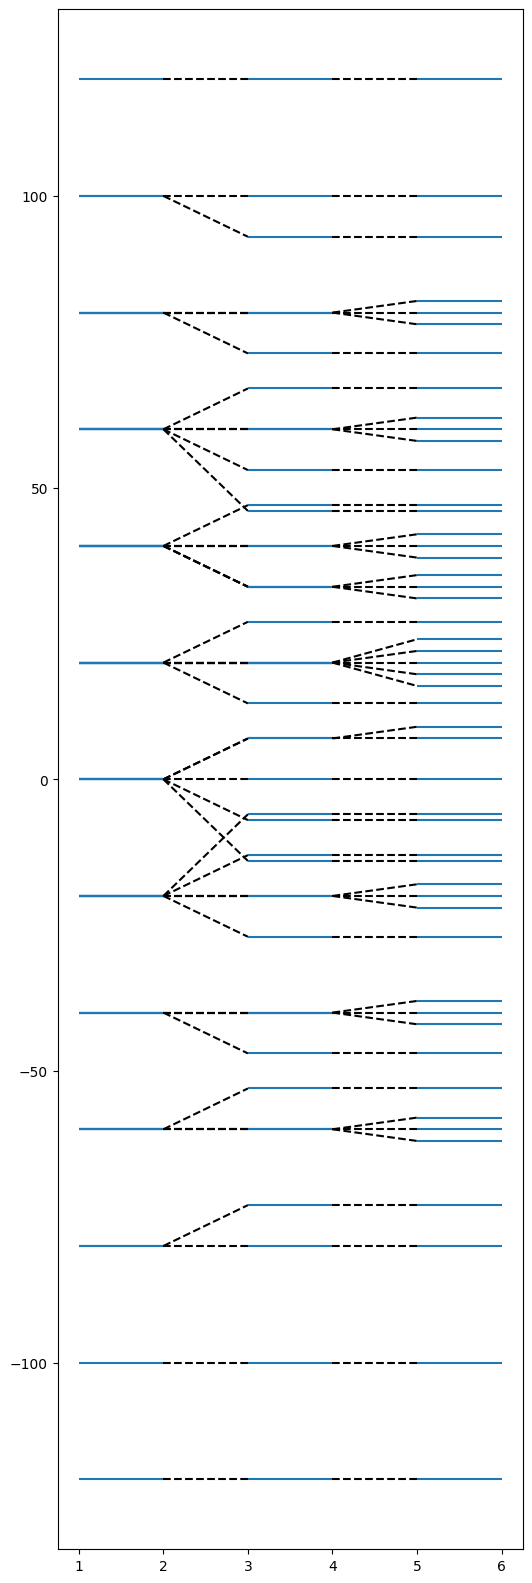

In [107]:
# linear_jklm =  linear_jklm[

Qx,Qy,Qz = 20,7,2

plt.figure(figsize=(6,20))
#level 1 
x0_extend = [1,2]
y0_lines = linear_jklm.jklm.apply(lambda x: Qx*x[0])
x1_extend = [3,4]
y1_lines = linear_jklm.jklm.apply(lambda x: Qx*x[0]+Qy*x[1])
x2_extend = [5,6]
y2_lines = linear_jklm.jklm.apply(lambda x: Qx*x[0]+Qy*x[1]+Qz*x[2])



plt.hlines(y0_lines,x0_extend[0],x0_extend[1])
for idx,line in enumerate(y1_lines):
    plt.plot([x0_extend[1],x1_extend[0]],[y0_lines[idx],line],'--',color='k')

plt.hlines(y1_lines,x1_extend[0],x1_extend[1])
for idx,line in enumerate(y2_lines):
    plt.plot([x1_extend[1],x2_extend[0]],[y1_lines[idx],line],'--',color='k')


plt.hlines(y2_lines,x2_extend[0],x2_extend[1])


# plt.plot(len(linear_jklm)*[x0_extend[1],x1_extend[0]],)


# plt.hlines(y_lines,x_extend[0],x_extend[1])

# x_extend = [5,6]
# y_lines = linear_jklm.jklm.apply(lambda x: x[0]+x[1]+x[2])
# plt.hlines(y_lines,x_extend[0],x_extend[1])

In [97]:
linear_jklm

,jklm,err,freq
0,"(1, 0, 0, 0)",0.000000e+00,-3.148115e-01
1,"(-2, 0, 0, -1)",2.209138e-11,-3.703771e-01
2,"(0, 0, 0, 0)",3.365884e-12,3.365884e-12
3,"(-1, 0, 0, 0)",1.813683e-11,3.148115e-01
4,"(1, 0, -1, 0)",4.600834e-08,-3.166777e-01


In [83]:
linear_jklm.jklm.apply(lambda x:  x[0])


0    1
1   -2
2    0
3   -1
4    1
Name: jklm, dtype: int64

In [84]:
 linear_jklm.jklm

0      (1, 0, 0, 0)
1    (-2, 0, 0, -1)
2      (0, 0, 0, 0)
3     (-1, 0, 0, 0)
4     (1, 0, -1, 0)
Name: jklm, dtype: object

In [74]:
fundamental_tunes

[-0.3148114676389241, -0.3173535793214774, 0.0018663215352980244]

In [73]:
5

5

In [68]:
linear_jklm.jklm.apply(lambda x: x[0]+x[1])

0     1
1    -2
2     0
3    -1
4     1
5     1
6     2
7    -3
8     3
9     4
10    1
11    1
12   -2
13   -2
14   -2
15   -4
16    1
17   -2
18    1
19    2
20    4
21    2
22    0
23   -1
24    3
25   -3
26    2
27    4
28    1
29   -5
30   -3
31    3
32   -1
33    0
34    5
35    1
36    4
37   -1
38   -6
39   -2
40    2
41    1
42   -3
43    3
44    1
45    4
46    6
47   -3
48    3
49    1
Name: jklm, dtype: int64

In [21]:
SS = Sussix()
SS.sussix_inp(nt1   = 1, 
              nt2   = turns,
              idam  = 2,
              ir    = 1,
              tunex = 0.31,
              tuney = 0.32,
              istun = None,
              nline = 0)


SS.sussix(x,px,y,py,0*x,0*x)
df = pd.DataFrame({'ax':SS.ax,'ox':SS.ox,'ay':SS.ay,'oy':SS.oy})#,'y':y,'py':py})
# df = df[df.ox>0]
# df.sort_values('ox',inplace=True)
# df = df.reset_index(drop=True)
df.head(10)

 X TUNE DIFFERENT FROM EXPECTED


,ax,ox,ay,oy
0,5.002899,0.310258,1.581137e-01,0.320264
1,5.007995,-0.310258,1.582773e-01,-0.320264
2,0.503179,0.059190,1.757492e-04,-0.320191
3,0.502490,-0.059189,6.901820e-06,-0.320886
4,0.500678,0.379483,4.626237e-06,-0.319635
5,0.500605,-0.379484,1.825729e-06,-0.321504
6,0.499136,0.069226,9.557525e-07,-0.318828
7,0.498463,-0.069226,4.415383e-07,-0.322469
8,0.022146,-0.058571,4.138144e-07,-0.320233
9,0.022192,0.058583,3.397384e-07,-0.318185


 -0.31025774459182320       0.31000000000000000     
 EXPECTED TUNE X FOUND AT LINE           2
 Y TUNE DIFFERENT FROM EXPECTED
 -0.32026391367161988       0.32000000000000001     
 EXPECTED TUNE Y FOUND AT LINE           2


In [148]:
Q,A

(array([0.31025794, 0.06922619, 0.37948412, 0.44871031]),
 array([5.  , 0.5 , 0.5 , 0.25]))

/var/folders/yf/hpn77ycx7h50r6rt81q7lghr0000gn/T/ipykernel_28559/3040088077.py:25: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.abs((px-px_r)/px),'o',alpha=0.2)


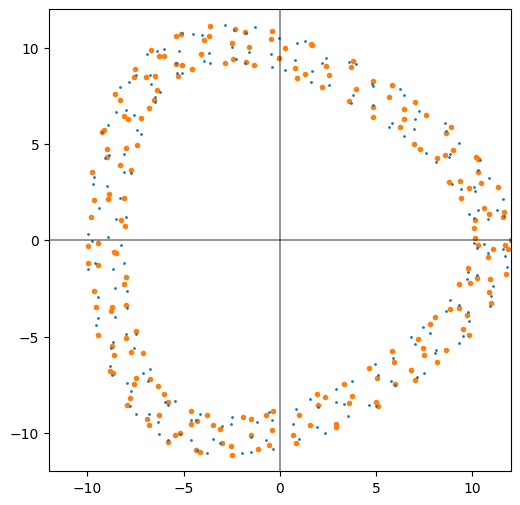

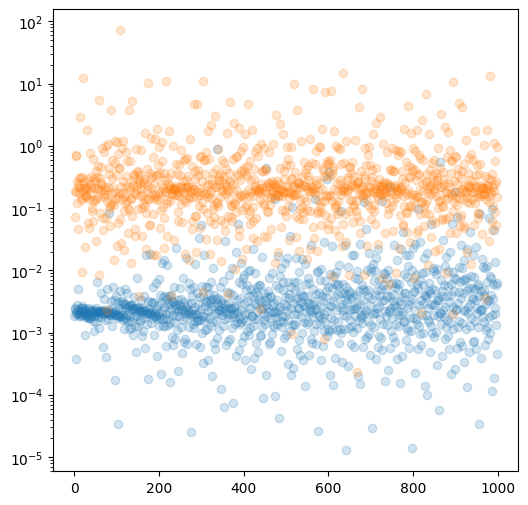

In [19]:
n_phasors = 4
selected_phasors = [0,2]
# selected_phasors = [0,2,4,7]
selected_phasors = [0,2,5,6]
# reconstructed = sum([_ax*np.exp(1j*(2*np.pi*(_ox)*N )) for _ax,_ox in zip(df.ax[:n_phasors],df.ox[:n_phasors])])
reconstructed = sum([2*_ax*np.exp(-1j*(2*np.pi*(_ox)*N  )) for _ax,_ox in zip(df.ax[selected_phasors],df.ox[selected_phasors])])


x_r  = reconstructed.real
px_r = reconstructed.imag

show_turn = 200
plt.figure(figsize=(6,6))
plt.plot(x_r[:show_turn],px_r[:show_turn],'.',color='C1')
plt.plot(x[:show_turn],px[:show_turn],'.',color='C0',ms=2)
# plt.plot(hx.real,hx.imag,'.',ms=2)
plt.axhline(0,color='k',alpha=0.4)
plt.axvline(0,color='k',alpha=0.4)
plt.axis('square');
plt.xlim([-12,12])
plt.ylim([-12,12])

plt.figure(figsize=(6,6))
plt.plot(np.abs((x-x_r)/x),'o',alpha=0.2)
plt.plot(np.abs((px-px_r)/px),'o',alpha=0.2)
plt.yscale('log')

/var/folders/yf/hpn77ycx7h50r6rt81q7lghr0000gn/T/ipykernel_28559/1339396323.py:55: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.abs((px-px_r)/px),'o',alpha=0.2)


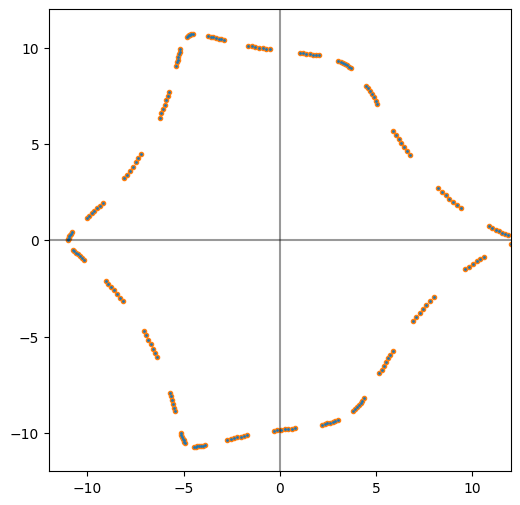

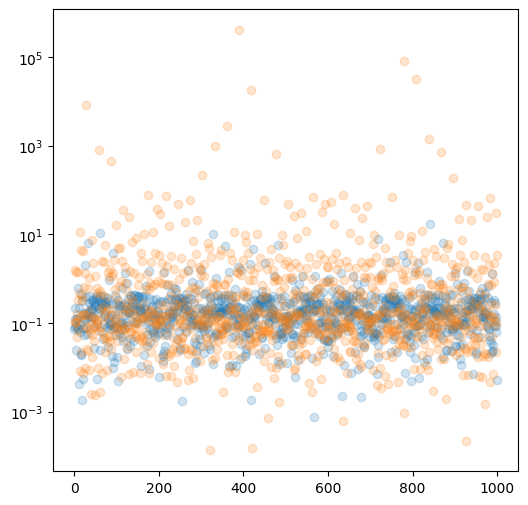

In [56]:
import NAFFlib
def NAFFlib_tune(x,nfreqs = 1,Hann_order=2,multiparticles = False):

    

    # No need to remove average, already done.
    if multiparticles:
        x = np.array(x)
        Q = NAFFlib.multiparticle_tunes(x, order=Hann_order)

        Q[Q<0] = np.nan
        return Q

    else:
        x        = np.array(x)
        Q,A,An  = NAFFlib.get_tunes(x, nfreqs, Hann_order)
        # Q,A      = NAFFlib.get_tunes_all(x, nfreqs, Hann_order)

        # np.abs(Ap[i]) is the amplitude
        if nfreqs ==1:
            return Q[0]
        else:
            # return Q,np.abs(Ap),np.abs(An)
            return Q,np.abs(A)
        


Q,A = NAFFlib_tune(x,nfreqs=4,Hann_order=2,multiparticles = False)


# n_phasors = 4
# selected_phasors = [0,2]
# selected_phasors = [0,2,4,6]
# reconstructed = sum([_ax*np.exp(1j*(2*np.pi*(_ox)*N )) for _ax,_ox in zip(df.ax[:n_phasors],df.ox[:n_phasors])])
reconstructed = sum([2*_ax*np.exp(-1j*(2*np.pi*(_ox)*N  )) for _ax,_ox in zip(A,Q)])


x_naff  = reconstructed.real
px_naff = reconstructed.imag

show_turn = 200
plt.figure(figsize=(6,6))
plt.plot(x_naff[:show_turn],px_naff[:show_turn],'.',color='C1')
plt.plot(x[:show_turn],px[:show_turn],'.',color='C0',ms=2)
# plt.plot(hx.real,hx.imag,'.',ms=2)
plt.axhline(0,color='k',alpha=0.4)
plt.axvline(0,color='k',alpha=0.4)
plt.axis('square');
plt.xlim([-12,12])
plt.ylim([-12,12])


plt.figure(figsize=(6,6))
plt.plot(np.abs((x-x_r)/x),'o',alpha=0.2)
plt.plot(np.abs((px-px_r)/px),'o',alpha=0.2)
plt.yscale('log')

In [54]:
results = pd.DataFrame({'A':A,'Q':Q})
display(results)

mn = [(1,0),(2,0),(3,0),(2,1)]
aj = [2*Jx,0.02*Jx,0.02*Jx,0.02*Jx]
# start = pd.DataFrame({'aj':np.sqrt(2*np.array(aj))})
# display(start)
[(np.sqrt(a)/2,m*Qx+n*Qy) for (m,n),a in zip(mn,aj)]


,A,Q
0,5.0,0.310258
1,0.5,0.069226
2,0.5,0.059220
3,0.5,0.379484


[(5.0, 0.31025793875089835),
 (0.5, 0.6205158775017967),
 (0.5, 0.9307738162526951),
 (0.5, 0.9407798775017967)]

0.320264